## Mission 2. Kaggle에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.
함께 보면 좋은 라이브러리 document
- numpy
- pandas
- seaborn
- matplotlib

무대뽀로 하기 힘들다면? 다음 Hint와 함께 시도해봅시다:

1. 데이터를 톺아봅시다.
- 각 데이터는 어떤 자료형을 가지고 있나요?
- 데이터에 **결측치**는 없나요? -> 있다면 이를 어떻게 메꿔줄까요?
- 데이터의 자료형을 바꿔줄 필요가 있나요? -> 범주형의 One-hot encoding

2. 데이터에 대한 가설을 세워봅시다.
- 가설은 개인의 경험에 의해서 도출되어도 상관이 없습니다.
- 가설은 명확할 수록 좋습니다 ex) _Titanic Data에서 Survival 여부와 성별에는 상관관계가 있다!_

3. 가설을 검증하기 위한 증거를 찾아봅시다.
- 이 증거는 한 눈에 보이지 않을 수 있습니다. 우리가 다룬 여러 Technique를 써줘야합니다.
- `.groupby()`를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까요?
- `.merge()`를 통해서 두개 이상의 dataFrame을 합치면 어떨까요?
- 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?

## EDA: Star Type Classification / NASA
- [별 유형 분류 문제(Star Type Classification / NASA)](https://www.kaggle.com/brsdincer/star-type-classification)을 통한 데이터 분석 & 시각화

### 속성 분석

- **`Temperature`**: Temperature (온도)
- **`L`**: Relative Luminosity (상대 밝기)
    - L/Lo: 해당 별의 밝기를 태양의 평균 밝기로 나눈 값
- **`R`**: Relative Radius (상대 반지름)
    - R/Ro: 해당 별의 반지름을 태양의 평균 반지름으로 나눈 값
- **`A_M`**: Absolute Magnitude (절대 등급)
    - 천체의 광도를 등급으로 나타낸 로그함수로, 천체가 정확히 10 파섹 (32.6 광년) 떨어져 있고 우주진에 의한 소광이 없다고 가정했을 때의 겉보기등급이다.
    - 낮을 수록 밝은 별이다.
- **`Color`**: General Color of Spectrum
    - 별의 나이를 추정해볼 수 있는 속성
    - 푸른 별은 젊고, 나이가 들수록 별이 붉어진다.
- **`Spectral_Class`**: O,B,A,F,G,K,M / SMASS - https://en.wikipedia.org/wiki/Asteroid_spectral_types
- **`Type`**: (유형)
    - 0: Red Dwarf (적색 왜성)
        - 작고 상대적으로 차가우며 태양의 0.081-0.5배 정도의 질량을 지닌 주계열성을 부르는 말
    - 1: Brown Dwarf (갈색 왜성)
        - 제일 무거운 가스행성과 가장 가벼운 항성 사이 질량 범위에 존재하는 준항성천체
    - 2: White Dwarf (백색 왜성)
        - 중간 이하의 질량을 지닌 항성이 핵융합을 마치고 도달하는 천체
    - 3: Main Sequence (주계열성)
        - 천문학에서 항성의 색등급도상에 나타나는 연속적이며 독특한 별의 띠를 말한다. 주계열은 색등급도에서 오른쪽 아래에서 왼쪽 위를 크게 가로지르며, 주계열 위에 위치한 별을 주계열성(主系列星, main sequence star) 또는 왜성(矮星, dwarf star)이라고 부른다
    - 4: Super Giants (초거성)
        - 초거성은 태양질량의 8~12 배 이상의 질량을 가지고 있고, 광도는 태양광도의 약 10,000 배에서 백만 배 이상이다.
    - 5: Hyper Giants (극대거성)
        -  여태까지 발견된 것 중 가장 밝은 별들을 뭉뚱그려 일컫는 용어

### 간단한 분석

- L, R은 태양에 비한 값이기 때문에 
    - 태양보다 어둡거나 작다면 1에 못미치는 값이 나올 것이고
    - 태양보다 밝거나 크다면 1보다 큰 값이 나올 것입니다.
- Type 1 갈색 왜성만 행성이고 나머지는 항성입니다.
- 초거성과 극대거성의 분류의 차이는 크지 않습니다.

### 가설 세우기
1. 별의 온도(Temperature)가 높을 수록 거대한 질량의 분류(4, 5)에 속할까?
2. 상대 밝기(L)와 상대 반지름(R)이 0에 가까울 수록 작은 질량의 분류(0, 1)에 속할까?
3. 별의 색깔(Color)을 통해 온도(Temperature), 절대 등급(A_M) 살펴보기

## 0. 라이브러리 준비

In [1]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# data는 `./datasets/train.csv`에 있음
# 데이터 불러오기

stars = pd.read_csv("./datasets/Stars.csv")

## 1. 분석의 목적과 변수 확인
- 별의 온도, 상대 밝기, 상대 반지름, 절대 크기, 색깔, 스펙트럼의 속성 중 어떠한 속성들이 Type을 결정할까?

In [3]:
# 상위 5개 데이터 확인하기
stars.head(5)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [4]:
# 각 colimn의 데이터 타입 확인하기

stars.dtypes

Temperature         int64
L                 float64
R                 float64
A_M               float64
Color              object
Spectral_Class     object
Type                int64
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [5]:
## 데이터 전체 정보를 얻는 함수

stars.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


- 240개의 행으로 이루어져 있습니다.
- Temperature
    - min~max의 차이가 많이 나고 
    - 낮은 온도의 값들이 min~Q3까지 몰려있습니다.
- L
    - min~max의 차이가 정말 큽니다.
    - min~ Q2까지 정말 작은 값들이 몰려있고
    - Q2~Q3 숫자가 크게 뜁니다.
    - Q3~Q4도 숫자가 크게 뜁니다.
- R
    - min~max의 차이가 큽니다.
    - L보다도 더 작은 값에 모여있습니다.
    - min~Q3 까지도 숫자 변화가 별로 없습니다,
- A_M
    - 가장 밝은 별인 min부터 거꾸로 퍼져있습니다.
- Type
    - 이 속성들에 대한 분류를 알려주는 것이고, 목표가 type으로 분류하는 것이므로 숫자에 대한 의미가 없을겁니다.

In [6]:
## 상관계수 확인!

stars.corr()

,Temperature,L,R,A_M,Type
Temperature,1.000000,0.393404,0.064216,-0.420261,0.411129
L,0.393404,1.000000,0.526516,-0.692619,0.676845
R,0.064216,0.526516,1.000000,-0.608728,0.660975
A_M,-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Type,0.411129,0.676845,0.660975,-0.955276,1.000000


- Temperature
    - L 과는 꽤 관계가 있어 보입니다.
    - R 과는 관계가 없어 보입니다.
    - A_M 과는 음의 상관관계가 꽤 있어 보입니다.
- L
    - R 과 꽤 관련이 있어 보입니다.
    - A_M과는 음의 상관관계가 꽤 있어 보입니다.
- R 
    - A_M과는 음의 상관관계가 꽤 있어 보입니다


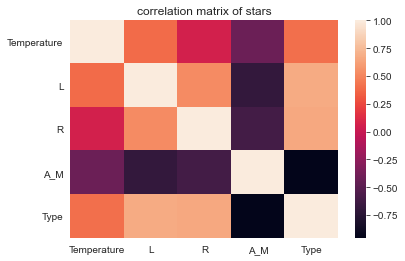

In [7]:
sns.set_style('whitegrid')
sns.heatmap(stars.corr())

plt.title("correlation matrix of stars")
plt. show()

In [8]:
## 결측치 확인

stars.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

- 결측치가 없는 깨끗한 데이터입니다!

- 앞으로 Type으로 그룹화하여 속성을 파악할 것입니다.
- Type별 모든 속성의 개수가 40개로 동일합니다.

## 3. 데이터의 개별 속성 파악하기

In [9]:
stars

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


### 4. 가설 검증하기 (1)
- 별의 온도(Temperature)가 높을 수록 거대한 질량의 분류(4, 5)에 속할까?

### I. Temperature

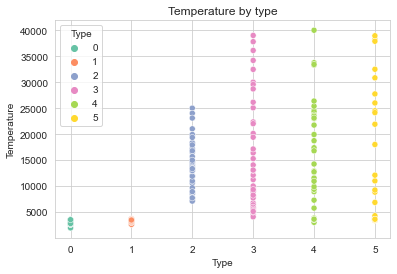

In [10]:
sns.scatterplot(x='Type', y='Temperature', hue='Type', palette='Set2', data=stars)
plt.title("Temperature by type")
plt.show()

- 분류별 별의 온도의 분포를 나타내보았습니다.

    - 별이 크고 무거우면 비교적 높은 온도일 것이라고 생각했습니다.  
    그러나 별이 크고 무겁다고 해서 모두 온도가 높은 것은 아닌 것 같습니다.

    - Type별로 모두 40개씩 점들이 찍힌 것이니,  
      Type 0, 1의 경우 비교적 낮은 온도에 엄청나게 몰려 있음을 알 수 있습니다.

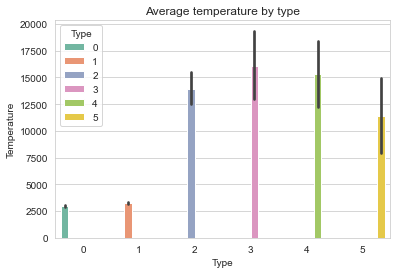

In [11]:
sns.barplot(x='Type', y='Temperature', hue='Type', palette='Set2', data=stars)

plt.title('Average temperature by type')
plt.show()

- 그래서 분류별 별의 평균 온도를 나타내 보았습니다.
    - Type 0, 1은 40개의 점이 낮은 온도에 빽빽하게 찍혀 있는 것 처럼 평균 온도가 확실히 낮고,
    - 별에 해당하는 Type 2, 3, 4, 5의 평균 온도가 높습니다.
    - 질량이 큰 초거성(4), 극대성(5)의 경우 평균 온도가 낮아지는 것을 보아  
    어떤 시점에서 부터는 별의 온도가 낮아진다는 것을 알 수 있습니다.

따라서,가설 1 (별의 온도(Temperature)가 높을 수록 거대한 질량의 분류(4, 5)에 속할까?')이  
Type 0, 1에 비해 Type 2, 3, 4, 5의 온도가 높다는 어느 정도의 경향성은 있지만,  
Type 2, 3의 평균 온도가 Type 4, 5 보다 더 높은 것으로 보아 **가설이 맞지 않다**는 것을 알 수 있습니다.

### 4. 가설 검증하기 (2)
- 상대 밝기(L)와 상대 반지름(R)이 0에 가까울 수록 작은 질량의 분류(0, 1)에 속할까?

### II. L (Relative Lumiousity)

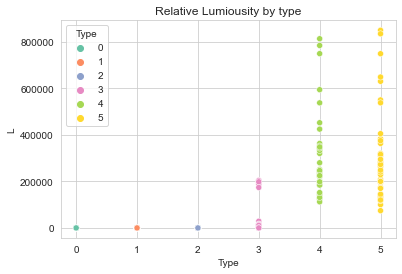

In [12]:
sns.scatterplot(x='Type', y='L', hue='Type', palette='Set2', data=stars)

plt.title("Relative Lumiousity by type")
plt.show()

In [13]:
stars.groupby('Type').mean()['L']

Type
0         0.000693
1         0.005406
2         0.002434
3     32067.386275
4    301816.250000
5    309246.525000
Name: L, dtype: float64

- 분류별 별의 상대 밝기를 나타내 보았습니다.
    - 산점도를 썼는데 Type 0, 1, 2는 40개의 점이 하나로 보일만큼 0에 몰려 있다는 것을 알 수 있습니다.  
    값을 확인해보니 정말 작은 수치입니다.

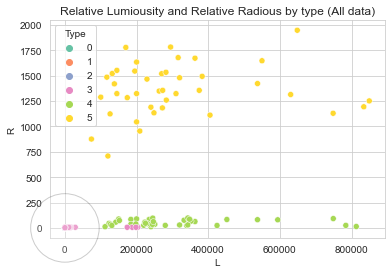

In [14]:
sns.scatterplot(x="L", y="R", hue='Type', palette="Set2", data=stars)

plt.text(0, 0, "    ", ha="center", va="center", size=40,
        bbox=dict(boxstyle="Circle", fc="w", ec="black", alpha=0.2))

plt.title("Relative Lumiousity and Relative Radious by type (All data)")
plt.show()

- 이번에는 상대 밝기(L), 상대 반지름(R)을 x, y에 나타내고, 분류별로 산점도를 나타내 보았습니다.
    - 대부분의 분류의 데이터가 상대 밝기는 많이 차이나지만, 상대 반지름은 거의 비슷한 것을 알 수 있습니다.(수평으로 점이 찍힘)
    - 데이터 값의 분포가 극단적으로 차이가 나기 때문에 모든 값을 표현하는 위의 표에서는 Type 0, 1, 2에 대한 데이터가 보이지 않았습니다.  
    그래서 위의 표의 원에 있는 부분을 확대하여 0에 가까운 Type 0, 1, 2를 표현해 보았습니다.

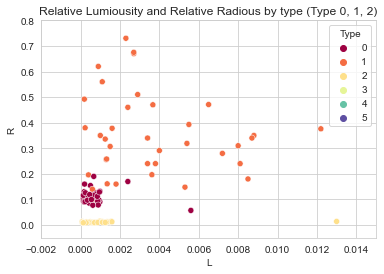

In [15]:
sns.scatterplot(x="L", y="R", hue='Type', palette="Spectral", data=stars)
plt.xlim(-0.002, 0.015)
plt.ylim(-0.05, 0.8)

plt.title("Relative Lumiousity and Relative Radious by type (Type 0, 1, 2)")
plt.show()

- x, y의 값의 범위를 조정하여 나타낸 결과입니다.
    - 데이터가 잘못 찍힌 것이 아니라, 너무 좁은 범위에 많은 점들이 모여 있었습니다.  
    상대 밝기, 상대 크기의 값이 0에 근접한 분류가 Type 0, 1, 2임을 알 수 있습니다.
    - Type 0, 1, 2는 태양에 비해 작은 질량을 가지는 천체입니다.

따라서, 가설 2 (상대 밝기(L)와 상대 반지름(R)이 0에 가까울 수록 작은 질량의 분류(0, 1)에 속할까?)가 맞는 것으로 검증되었습니다.

### 4. 가설 검증하기 (3)
- 별의 색깔(Color)을 통해 온도(Temperature), 절대 등급(A_M) 살펴보기

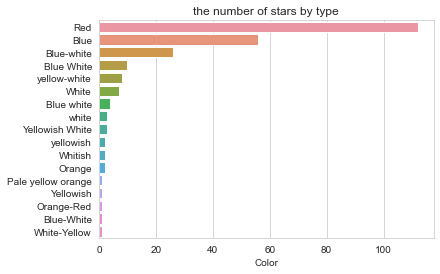

In [16]:
stars_color = pd.DataFrame(stars['Color'].value_counts())
sns.barplot(x=stars_color['Color'], y=stars_color.index)

plt.title("the number of stars by type")
plt.show()


In [17]:
    stars.Color.unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

- 색깔별 별의 숫자를 전체 데이터에 대해서 나타냈습니다.
    - Blue와 Red에 대한 데이터가 많음을 알 수 있습니다.
    - 그런데 데이터를 자세히 보니 Blue White / Blue-white / Blue-White 이런식으로 데이터가 잘못 담겨있는 것이 확인되었습니다.
    - 따라서, 색을 단순히 'Red', 'Blue', 'White', 'Yellow'로 조정시켜 데이터 분석을 진행하도록 하겠습니다.

In [18]:
stars = pd.read_csv("./datasets/stars.csv")

In [19]:
new_colors = {
    'Red': 'Red',
    'Blue White': 'Blue',
    'White': 'White',
    'Yellowish White': 'Yellow',
    'Blue white': 'Blue',
    'Pale yellow orange': 'Yellow',
    'Blue': 'Blue',
    'Blue-white': 'Blue',
    'Whitish': 'White',
    'yellow-white': 'Yellow',
    'Orange': 'Red',
    'White-Yellow': 'White',
    'white': 'White',
    'yellowish': 'Yellow',
    'Yellowish': 'Yellow',
    'Orange-Red': 'Red',
    'Blue-White': 'Blue'
}
Color = stars.Color.map(new_colors)
Color.unique()
stars.Color = Color
stars.Color.value_counts()

Red       115
Blue       97
Yellow     15
White      13
Name: Color, dtype: int64

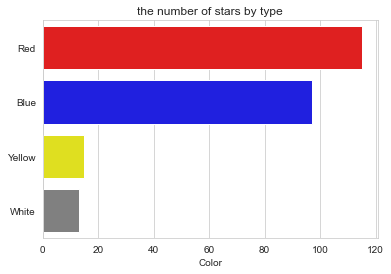

In [20]:
color_graph = {
    'Red': 'red',
    'Blue': 'blue',
    'White': 'gray',
    'Yellow': 'yellow'
}
stars_color = pd.DataFrame(stars.Color.value_counts())
sns.barplot(x=stars_color.Color, y=stars_color.index, palette=color_graph)

plt.title("the number of stars by type")
plt.show()


- Color의 범주를 줄여 그래프로 표현해 보았습니다.

#### I. Temperature

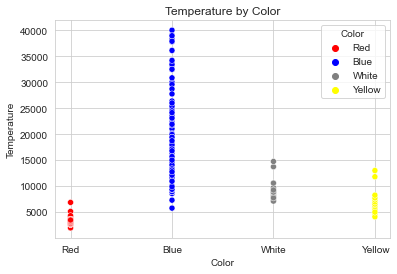

In [21]:
sns.scatterplot(x='Color', y='Temperature', hue='Color', palette=color_graph,data=stars)

plt.title('Temperature by Color')
plt.show()

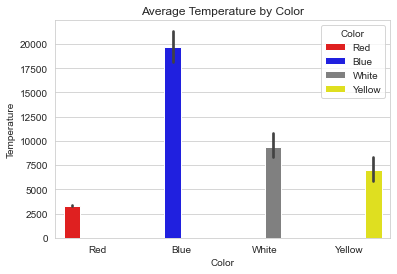

In [22]:
sns.barplot(x='Color', y='Temperature', hue='Color', palette=color_graph,data=stars)

plt.title('Average Temperature by Color')
plt.show()

- 색깔별 온도의 분포와 평균 온도를 나타내 보았습니다.
    - 푸른 별이 가장 뜨겁고, 붉은 별이 가장 온도가 낮다는 것을 알 수 있습니다.

#### II. Absolute Magnitude

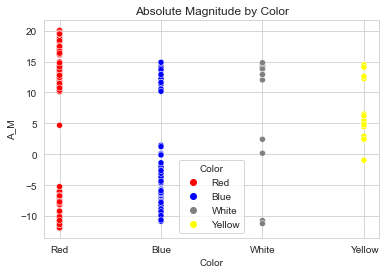

In [23]:
sns.scatterplot(x='Color', y='A_M', hue='Color', palette=color_graph,data=stars)

plt.title('Absolute Magnitude by Color')
plt.show()

- 색깔별 절대 등급의 분포를 나타내 보았습니다.
    - 값이 작을 수록 밝은 별입니다.
    - 그런데, 데이터를 보아하니 대부분의 색깔 범주에서 밝은 등급에도, 어두운 등급에도 많은 데이터가 분포합니다.
    - 따라서, 별의 색깔은 절대 등급에 영향을 주지 못하는 것을 알 수 있습니다.

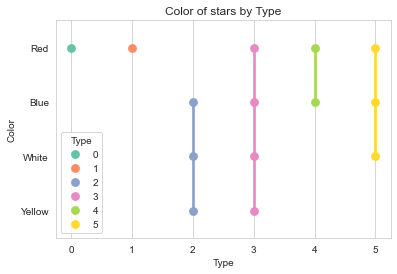

In [24]:
sns.pointplot(x='Type', y='Color', hue='Type', palette='Set2', data=stars)

plt.title('Color of stars by Type')
plt.show()

- 각 범주별로 색깔을 나타내 보았습니다.
    - Type 0, 1의 경우 모두 붉은 별입니다.
        - 질량, 상대 밝기, 상대 반지름이 작은 별들은 모두 온도가 낮은 붉은 별입니다.